<div class="alert alert-success">    
    <h1 style="direction: rtl;text-align:center;font-family:B Roya;font-size: 40px;">هوش مصنوعی</h1>
    <h2 style="direction: rtl;text-align:center;font-family:B Roya;font-size: 25px;">مجید محبی</h2>
    <h3 style="direction: rtl;text-align:center;font-family:B Roya;font-size: 20px;">دانشکده مهندسی برق و کامپیوتر دانشگاه زنجان</h3>
    <h4 style="direction: rtl;text-align:center;font-family:B Roya;font-size: 18px;">بهار 1404</h4>
</div>

<h4 style="charset:utf-8; lang:fa-IR; direction: rtl;text-align:right;font-family:B Roya;font-size: 22px;color:RGB(127,96,0)">

<body> 
پروژه سوم: طراحی سیستم زمان‌بندی دروس با الگوریتم  Min-Conflicts  
</body> 

</h4>

<h4 style="charset:utf-8; lang:fa-IR; direction: rtl;text-align:right;font-family:B Roya;font-size: 18px;color:RGB(127,96,0)">

<body>
نام و نام خانوادگی
<br>

</body> 

</h4>

<h4 style="charset:utf-8; lang:fa-IR; direction: rtl;text-align:right;font-family:B Roya;font-size: 18px;color:RGB(127,96,0)">

<body>
شماره دانشجویی
<br>

</body> 

</h4>

Feasibility check: No obvious constraints preventing a conflict-free schedule
Step 1, Conflicts: 26
Step 2, Conflicts: 21
Step 3, Conflicts: 16
Step 4, Conflicts: 13
Step 5, Conflicts: 10
Step 6, Conflicts: 7
Step 7, Conflicts: 5
Step 8, Conflicts: 4
Step 9, Conflicts: 2
Step 10, Conflicts: 2
Step 11, Conflicts: 2
Step 12, Conflicts: 2
Step 13, Conflicts: 2
Step 14, Conflicts: 2
Step 15, Conflicts: 2
Step 16, Conflicts: 2
Step 17, Conflicts: 2
Step 18, Conflicts: 2
Step 19, Conflicts: 2
Step 20, Conflicts: 2
Step 21, Conflicts: 2
Step 22, Conflicts: 2
Step 23, Conflicts: 2
Step 24, Conflicts: 2
Step 25, Conflicts: 2
Step 26, Conflicts: 2
Step 27, Conflicts: 2
Step 28, Conflicts: 2
Step 29, Conflicts: 2
Step 30, Conflicts: 2
Step 31, Conflicts: 2
Step 32, Conflicts: 2
Step 33, Conflicts: 2
Step 34, Conflicts: 2
Step 35, Conflicts: 2
Step 36, Conflicts: 2
Step 37, Conflicts: 2
Step 38, Conflicts: 2
Step 39, Conflicts: 2
Step 40, Conflicts: 2
Step 41, Conflicts: 2
Step 42, Conflicts: 2
St

,Lesson,Time Slot,Room
0,D1,Wed-10-12,Room1
1,D10,Wed-16-18,Room5
2,D11,Mon-10-12,Room1
3,D12,Mon-08-10,Room2
4,D13,Mon-12-14,Room1
5,D14,Wed-08-10,Room1
6,D15,Mon-08-10,Room1
7,D16,Mon-12-14,Room1
8,D17,Wed-14-16,Room2
9,D18,Sat-14-16,Room2



Total remaining conflicts: 0


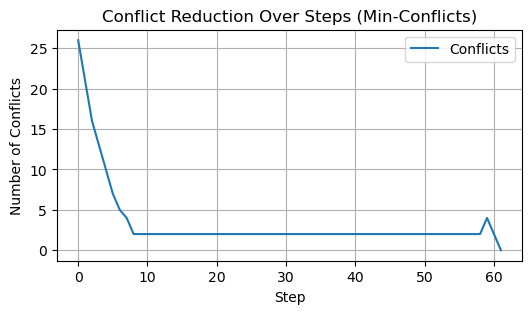


Summary:
Parameters - Max Steps: 1000, Restarts: 5, Accept Probability: 0.2, Initial Temperature: 20, Temperature Decay: 0.995
Success Status: Achieved goal (0 conflicts)


In [2]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

MAX_STEPS = 1000
RESTARTS = 5
ACCEPT_PROB = 0.2
INITIAL_TEMP = 20
TEMP_DECAY = 0.995

days = ['Sat', 'Mon', 'Wed']
slots_per_day = ['08-10', '10-12', '12-14', '14-16', '16-18']
time_slots = [f"{day}-{slot}" for day in days for slot in slots_per_day]

classrooms = [{'id': f'Room{i+1}', 'capacity': cap} for i, cap in enumerate([25, 30, 35, 40, 50])]

random.seed(42)
lessons = []
for i in range(20):
    allowed = random.sample(time_slots, k=random.randint(10, 13))
    lessons.append({'id': f'D{i+1}', 'available_slots': allowed})

students = []
all_lessons = [l['id'] for l in lessons]
for i in range(50):
    students.append({
        'id': f'S{i+1}',
        'lessons': random.sample(all_lessons, k=random.randint(3, 6))
    })

def check_feasibility():
    total_student_slots = sum(len(student['lessons']) for student in students)
    max_capacity = sum(room['capacity'] for room in classrooms)
    total_time_slots = len(time_slots)

    if total_student_slots > max_capacity * total_time_slots:
        return f"Warning: Total student load ({total_student_slots}) exceeds available capacity ({max_capacity * total_time_slots})"

    lesson_counts = {lesson['id']: 0 for lesson in lessons}
    for student in students:
        for lesson_id in student['lessons']:
            lesson_counts[lesson_id] += 1
    max_lesson_size = max(lesson_counts.values())
    max_room_capacity = max(room['capacity'] for room in classrooms)
    if max_lesson_size > max_room_capacity:
        return f"Warning: Lesson with {max_lesson_size} students exceeds max room capacity ({max_room_capacity})"

    min_available_slots = min(len(lesson['available_slots']) for lesson in lessons)
    if min_available_slots < 5:
        return f"Warning: Some lessons have very few available slots ({min_available_slots})"

    return "Feasibility check: No obvious constraints preventing a conflict-free schedule"

def create_random_schedule():
    schedule = {}
    for lesson in lessons:
        ts = random.choice(lesson['available_slots'])
        room = random.choice(classrooms)['id']
        schedule[lesson['id']] = (ts, room)
    return schedule

def count_conflicts(schedule):
    time_conflicts = 0
    capacity_conflicts = 0

    for student in students:
        seen_slots = {}
        for lesson_id in student['lessons']:
            for lesson, (ts, room) in schedule.items():
                if lesson == lesson_id:
                    if ts in seen_slots:
                        time_conflicts += 1
                    else:
                        seen_slots[ts] = True

    for room in classrooms:
        room_id = room['id']
        student_count = {ts: 0 for ts in time_slots}
        for lesson, (ts, assigned_room) in schedule.items():
            if assigned_room == room_id:
                for student in students:
                    if lesson in student['lessons']:
                        student_count[ts] += 1
        for ts in time_slots:
            if student_count[ts] > room['capacity']:
                capacity_conflicts += (student_count[ts] - room['capacity'])

    return time_conflicts + capacity_conflicts

def get_conflicting_lessons(schedule):
    conflict_scores = {lesson_id: 0 for lesson_id in schedule}
    conflicting_lessons = set()

    for student in students:
        seen_slots = {}
        for lesson_id in student['lessons']:
            for lesson, (ts, room) in schedule.items():
                if lesson == lesson_id:
                    if ts in seen_slots:
                        conflicting_lessons.add(lesson_id)
                        conflicting_lessons.add(seen_slots[ts])
                        conflict_scores[lesson_id] += 1
                        conflict_scores[seen_slots[ts]] += 1
                    else:
                        seen_slots[ts] = lesson_id

    for room in classrooms:
        room_id = room['id']
        student_count = {ts: 0 for ts in time_slots}
        for lesson, (ts, assigned_room) in schedule.items():
            if assigned_room == room_id:
                for student in students:
                    if lesson in student['lessons']:
                        student_count[ts] += 1
        for ts in time_slots:
            if student_count[ts] > room['capacity']:
                for lesson, (ts2, assigned_room) in schedule.items():
                    if assigned_room == room_id and ts2 == ts:
                        conflicting_lessons.add(lesson)
                        conflict_scores[lesson] += student_count[ts] - room['capacity']

    return sorted(conflicting_lessons, key=lambda x: conflict_scores[x], reverse=True)

def find_best_assignment(lesson_id, schedule):
    best_assignment = None
    best_conflicts = float('inf')
    current_assignment = schedule[lesson_id]

    for ts in lessons[int(lesson_id[1:]) - 1]['available_slots']:
        for room in classrooms:
            schedule[lesson_id] = (ts, room['id'])
            conflicts = count_conflicts(schedule)
            if conflicts < best_conflicts:
                best_conflicts = conflicts
                best_assignment = (ts, room['id'])

    schedule[lesson_id] = current_assignment
    return best_assignment, best_conflicts

def swap_lessons(lesson1_id, lesson2_id, schedule):
    ts1, room1 = schedule[lesson1_id]
    ts2, room2 = schedule[lesson2_id]

    lesson1_idx = int(lesson1_id[1:]) - 1
    lesson2_idx = int(lesson2_id[1:]) - 1
    if ts2 not in lessons[lesson1_idx]['available_slots'] or ts1 not in lessons[lesson2_idx]['available_slots']:
        return None

    schedule[lesson1_id] = (ts2, room2)
    schedule[lesson2_id] = (ts1, room1)
    conflicts = count_conflicts(schedule)
    return conflicts

def min_conflicts():
    best_schedule = None
    best_conflicts = float('inf')
    conflict_history = []
    temperature = INITIAL_TEMP

    print(check_feasibility())

    for restart in range(RESTARTS):
        schedule = create_random_schedule()
        conflicts = count_conflicts(schedule)

        for step in range(MAX_STEPS):
            conflict_history.append((step + restart * MAX_STEPS, conflicts))
            print(f"Step {step + 1}, Conflicts: {conflicts}")

            if conflicts == 0:
                print("Found conflict-free schedule")
                return schedule, conflict_history

            conflicting_lessons = get_conflicting_lessons(schedule)
            lesson_with_conflict = conflicting_lessons[0] if conflicting_lessons else random.choice(list(schedule.keys()))
            current_assignment = schedule[lesson_with_conflict]
            current_conflicts = conflicts

            best_assignment, new_conflicts = find_best_assignment(lesson_with_conflict, schedule)

            if best_assignment:
                schedule[lesson_with_conflict] = best_assignment
                if new_conflicts < current_conflicts:
                    conflicts = new_conflicts
                elif random.random() < ACCEPT_PROB * math.exp(-(new_conflicts - current_conflicts) / temperature):
                    conflicts = new_conflicts
                else:
                    schedule[lesson_with_conflict] = current_assignment

            if conflicting_lessons and len(conflicting_lessons) > 1 and random.random() < 0.3:
                lesson2 = random.choice(conflicting_lessons[1:])
                current_assignment2 = schedule[lesson2]
                swap_conflicts = swap_lessons(lesson_with_conflict, lesson2, schedule)
                if swap_conflicts is not None:
                    if swap_conflicts < conflicts:
                        conflicts = swap_conflicts
                    elif random.random() < ACCEPT_PROB * math.exp(-(swap_conflicts - conflicts) / temperature):
                        conflicts = swap_conflicts
                    else:
                        schedule[lesson_with_conflict] = current_assignment
                        schedule[lesson2] = current_assignment2

            if conflicts < best_conflicts:
                best_conflicts = conflicts
                best_schedule = schedule.copy()

            temperature *= TEMP_DECAY

        if best_conflicts == 0:
            print("Found conflict-free schedule in restart")
            return best_schedule, conflict_history

    print("Reached max steps without finding conflict-free schedule")
    return best_schedule, conflict_history

random.seed(42)
final_schedule, conflict_history = min_conflicts()

print("\nFinal Schedule:")
schedule_data = [(lesson_id, ts, room) for lesson_id, (ts, room) in sorted(final_schedule.items())]
df = pd.DataFrame(schedule_data, columns=['Lesson', 'Time Slot', 'Room'])
display(df.style.set_properties(**{'text-align': 'left', 'direction': 'ltr', 'font-family': 'Arial'}))

print(f"\nTotal remaining conflicts: {count_conflicts(final_schedule)}")

plt.figure(figsize=(6, 3))
steps, conflicts = zip(*conflict_history)
plt.plot(steps, conflicts, label='Conflicts', color='#1f77b4')
plt.xlabel('Step')
plt.ylabel('Number of Conflicts')
plt.title('Conflict Reduction Over Steps (Min-Conflicts)')
plt.grid(True)
plt.legend()
plt.show()

print("\nSummary:")
print(f"Parameters - Max Steps: {MAX_STEPS}, Restarts: {RESTARTS}, Accept Probability: {ACCEPT_PROB}, Initial Temperature: {INITIAL_TEMP}, Temperature Decay: {TEMP_DECAY}")
final_conflicts = count_conflicts(final_schedule)
if final_conflicts == 0:
    print("Success Status: Achieved goal (0 conflicts)")
else:
    print(f"Success Status: Did not achieve goal, remaining conflicts: {final_conflicts}")
